# Training YOLOv9 model on Custom Dataset

## Setup & Download

In [1]:
!nvidia-smi

Thu May 16 07:10:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.08             Driver Version: 535.161.08   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       On  | 00000000:00:1E.0 Off |                    0 |
| N/A   25C    P8               9W /  70W |      2MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = '/home/ubuntu/s15-yolov9'
print(HOME)

/home/ubuntu/s15-yolov9


In [3]:
!git clone --quiet https://github.com/SkalskiP/yolov9.git
%cd yolov9


/home/ubuntu/s15-yolov9/src/yolov9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.29 requires opencv-python-headless==4.8.0.74, but you have opencv-python-headless 4.9.0.80 which is incompatible.


### Download model Weights

In [4]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [5]:
!ls -la {HOME}/weights

total 402440
drwxrwxr-x 2 ubuntu ubuntu      4096 May 16 07:12 .
drwxrwxr-x 6 ubuntu ubuntu      4096 May 16 07:12 ..
-rw-rw-r-- 1 ubuntu ubuntu  51508261 Feb 18 12:36 gelan-c.pt
-rw-rw-r-- 1 ubuntu ubuntu 117203713 Feb 18 12:36 gelan-e.pt
-rw-rw-r-- 1 ubuntu ubuntu 103153312 Feb 18 12:36 yolov9-c.pt
-rw-rw-r-- 1 ubuntu ubuntu 140217688 Feb 18 12:36 yolov9-e.pt


## Train Custom Model YOLOv9

In [6]:
%cp -r {HOME}/data {HOME}/src/yolov9/data

In [7]:
%cd {HOME}/src/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {HOME}/src/yolov9/data/data/customdata/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/home/ubuntu/s15-yolov9/src/yolov9
train: weights=/home/ubuntu/s15-yolov9/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/home/ubuntu/s15-yolov9/src/yolov9/data/data/customdata/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.10.14 torch-2.2.0 CUDA:0 (Tesla T4, 14931MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, bo

## Examine Training Results

In [9]:
!ls {HOME}/src/yolov9/runs/train/exp/

F1_curve.png						results.png
PR_curve.png						train_batch0.jpg
P_curve.png						train_batch1.jpg
R_curve.png						train_batch2.jpg
confusion_matrix.png					val_batch0_labels.jpg
events.out.tfevents.1715843580.ip-172-31-5-208.39594.0	val_batch0_pred.jpg
hyp.yaml						val_batch1_labels.jpg
labels.jpg						val_batch1_pred.jpg
labels_correlogram.jpg					val_batch2_labels.jpg
opt.yaml						val_batch2_pred.jpg
results.csv						weights


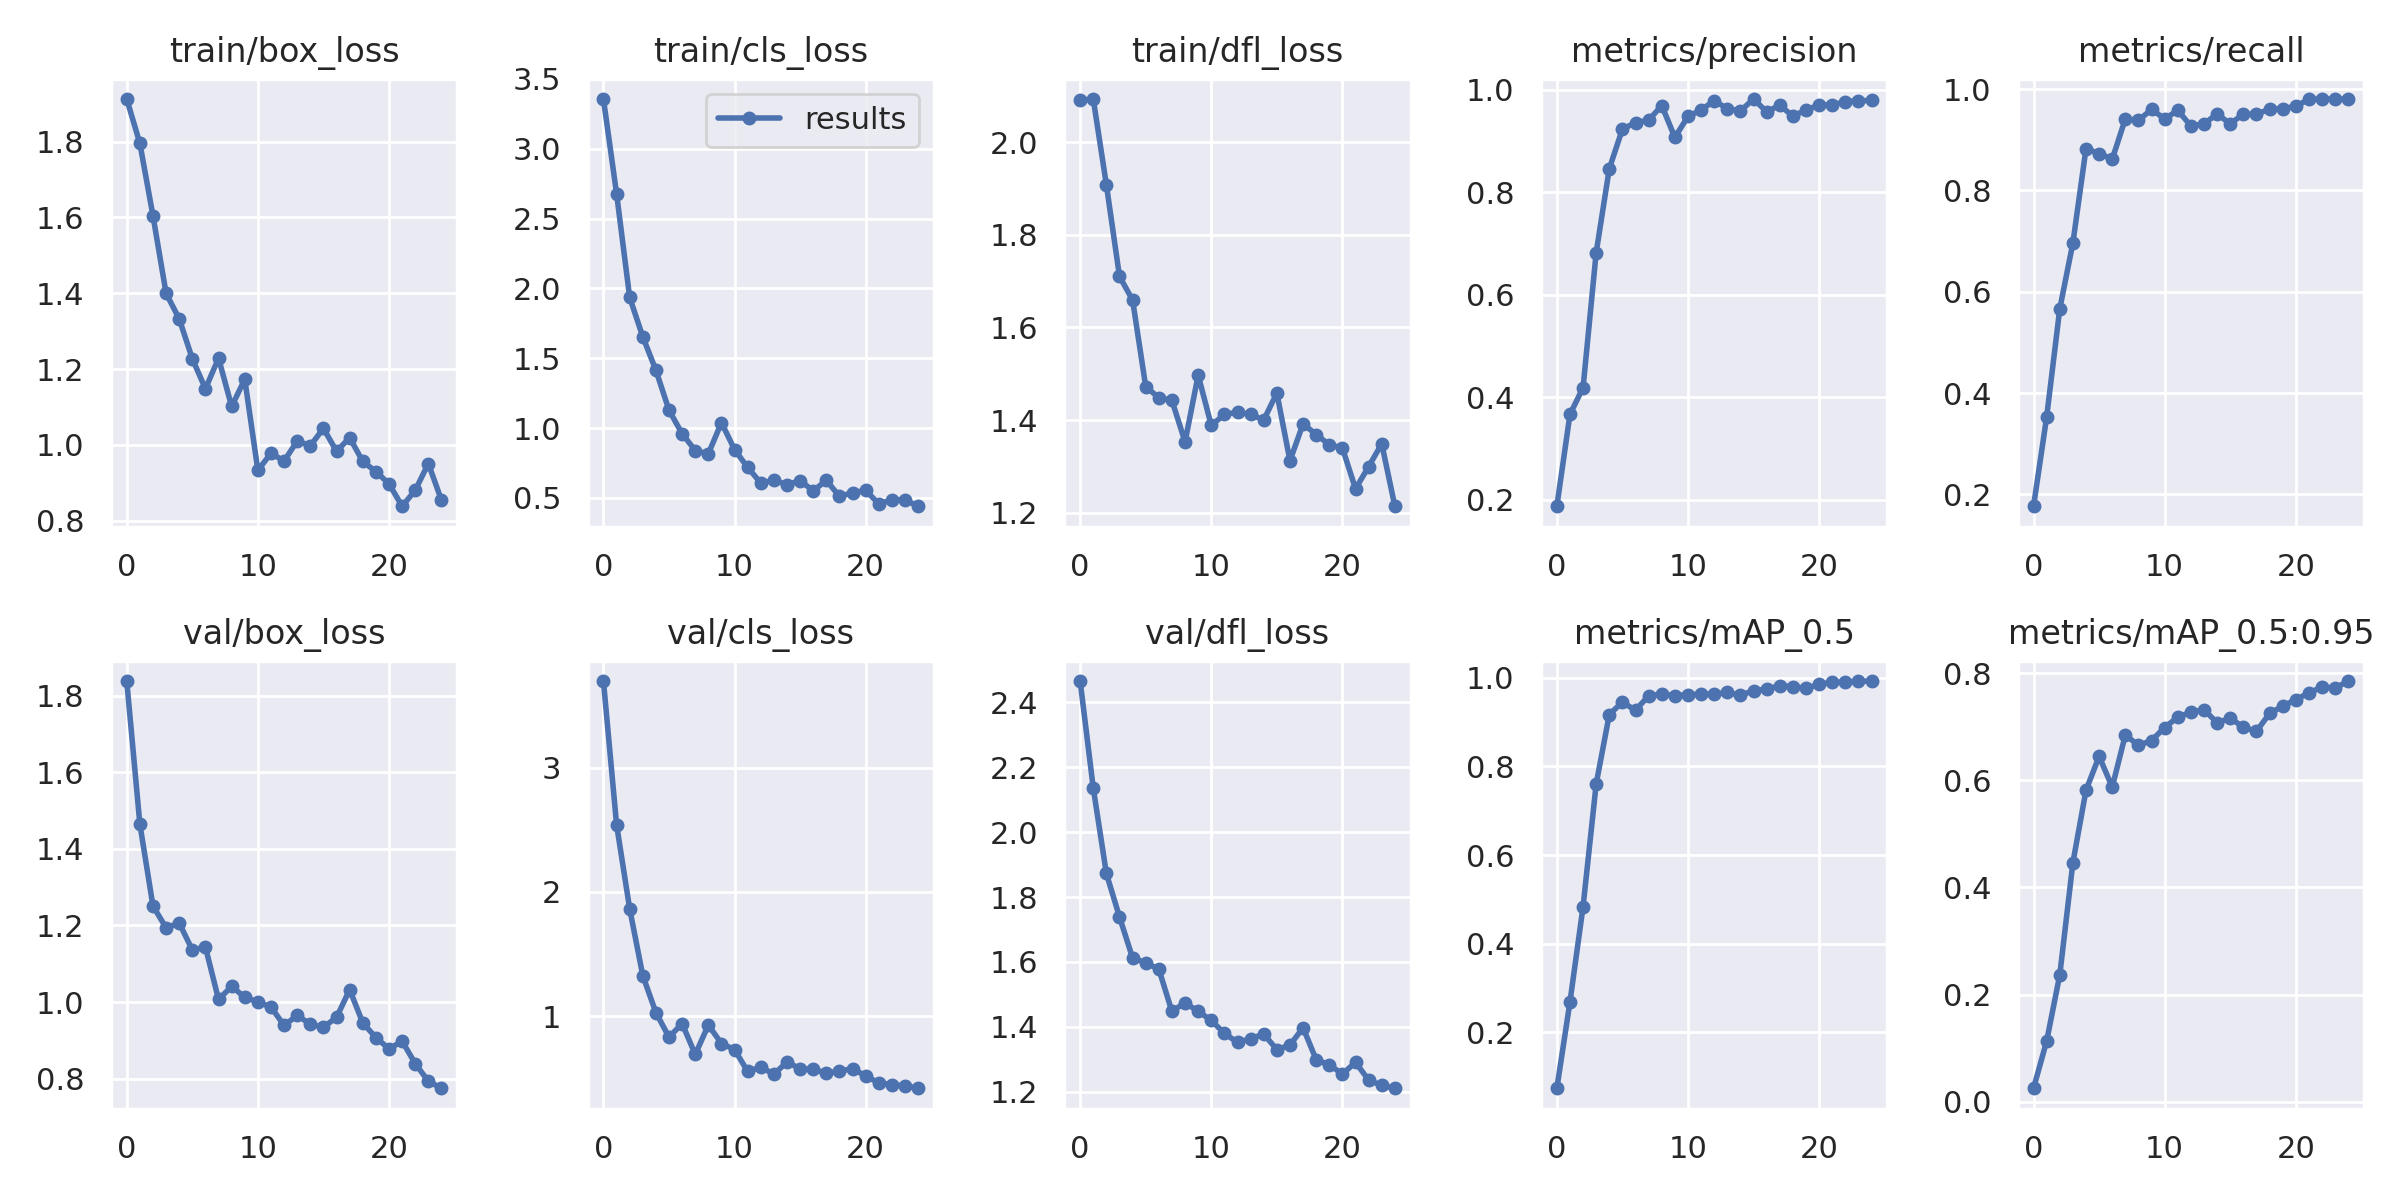

In [10]:
from IPython.display import Image

Image(filename=f"{HOME}/src/yolov9/runs/train/exp/results.png", width=1000)

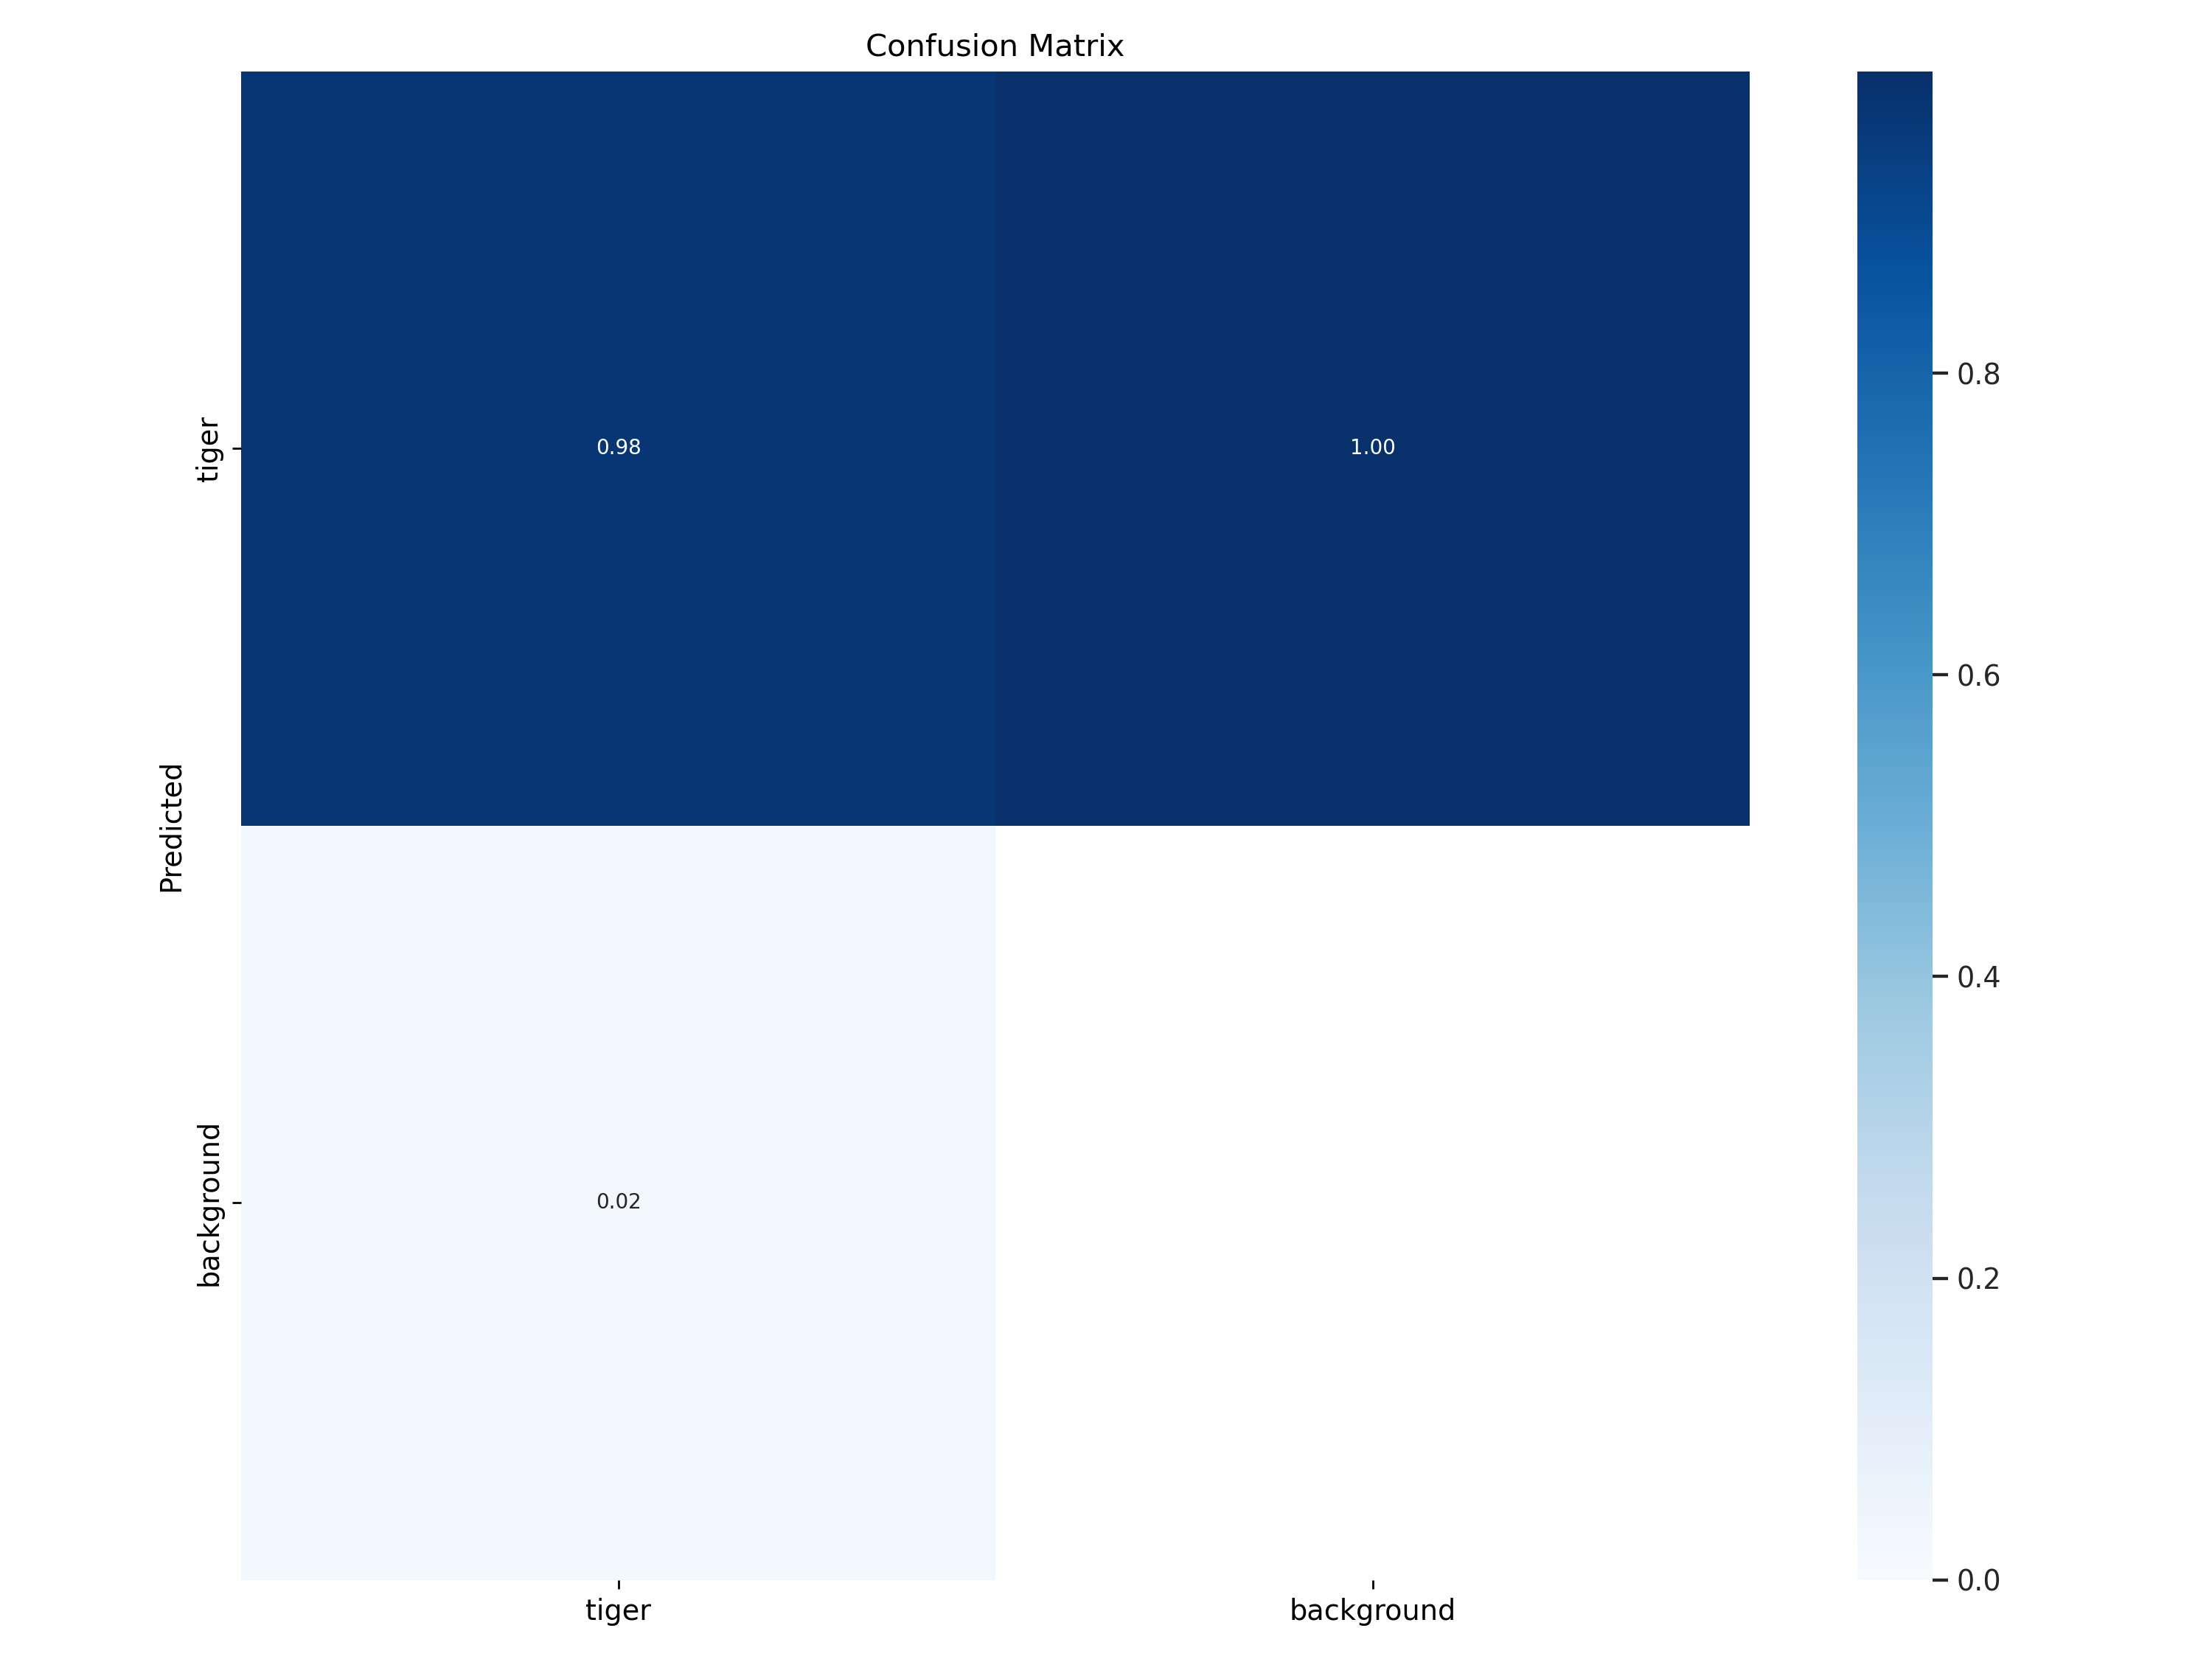

In [12]:
from IPython.display import Image

Image(filename=f"{HOME}/src/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

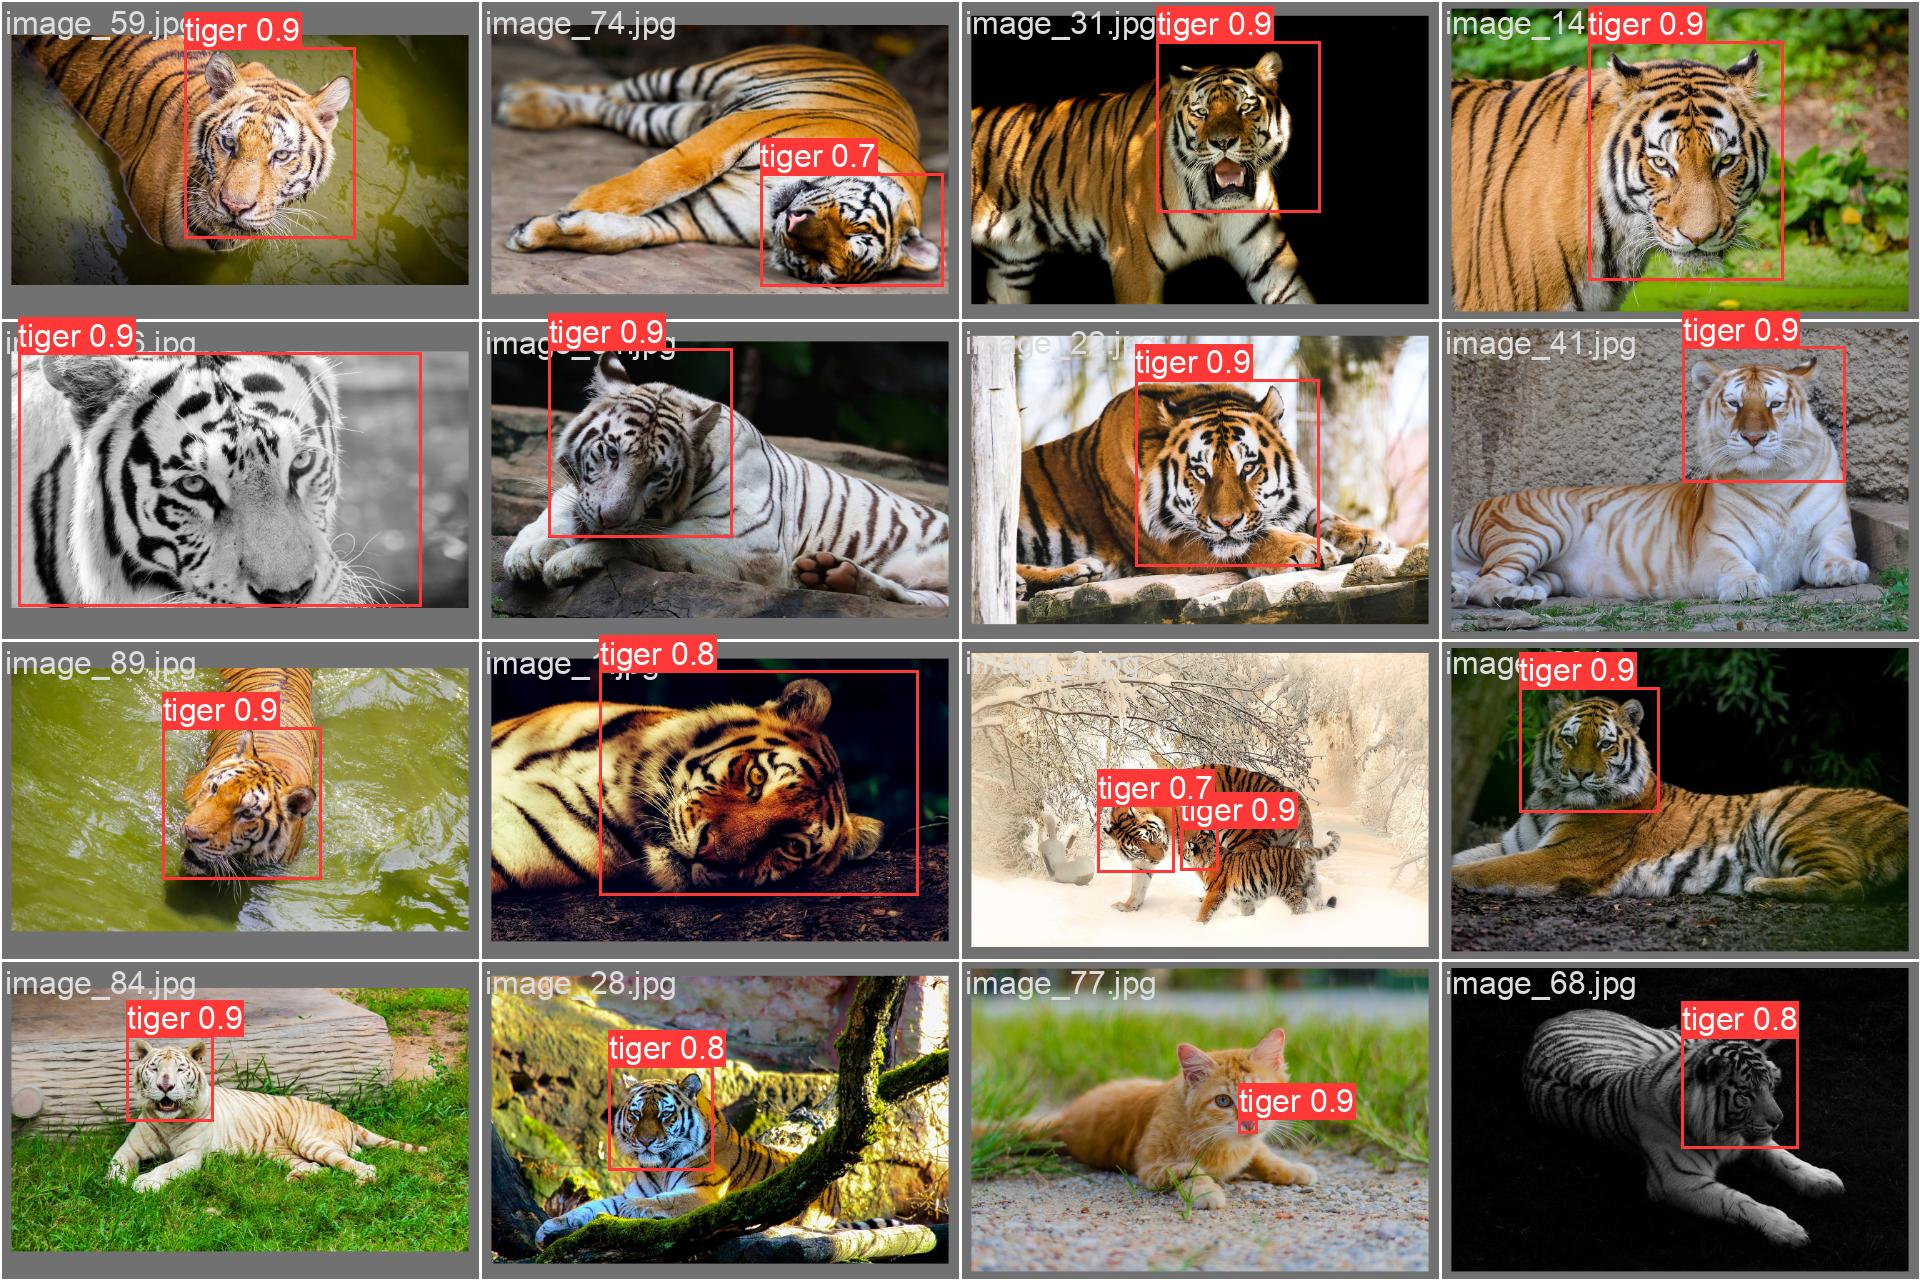

In [13]:
from IPython.display import Image

Image(filename=f"{HOME}/src/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

### Validate Custom Model

In [14]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {HOME}/src/yolov9/data/data/customdata/data.yaml \
--weights {HOME}/src/yolov9/runs/train/exp/weights/best.pt

[Errno 2] No such file or directory: '/home/ubuntu/s15-yolov9/yolov9'
/home/ubuntu/s15-yolov9/src/yolov9
val: data=/home/ubuntu/s15-yolov9/src/yolov9/data/data/customdata/data.yaml, weights=['/home/ubuntu/s15-yolov9/src/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.14 torch-2.2.0 CUDA:0 (Tesla T4, 14931MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /home/ubuntu/s15-yolov9/src/yolov9/data/data/customdata/train/labe
                 Class     Images  Instances          P          R      mAP50   
                   all        100        102      0.979       0.98      0.992      0.787
Speed: 0.7ms pre-proce

### Inference with YOLOv9

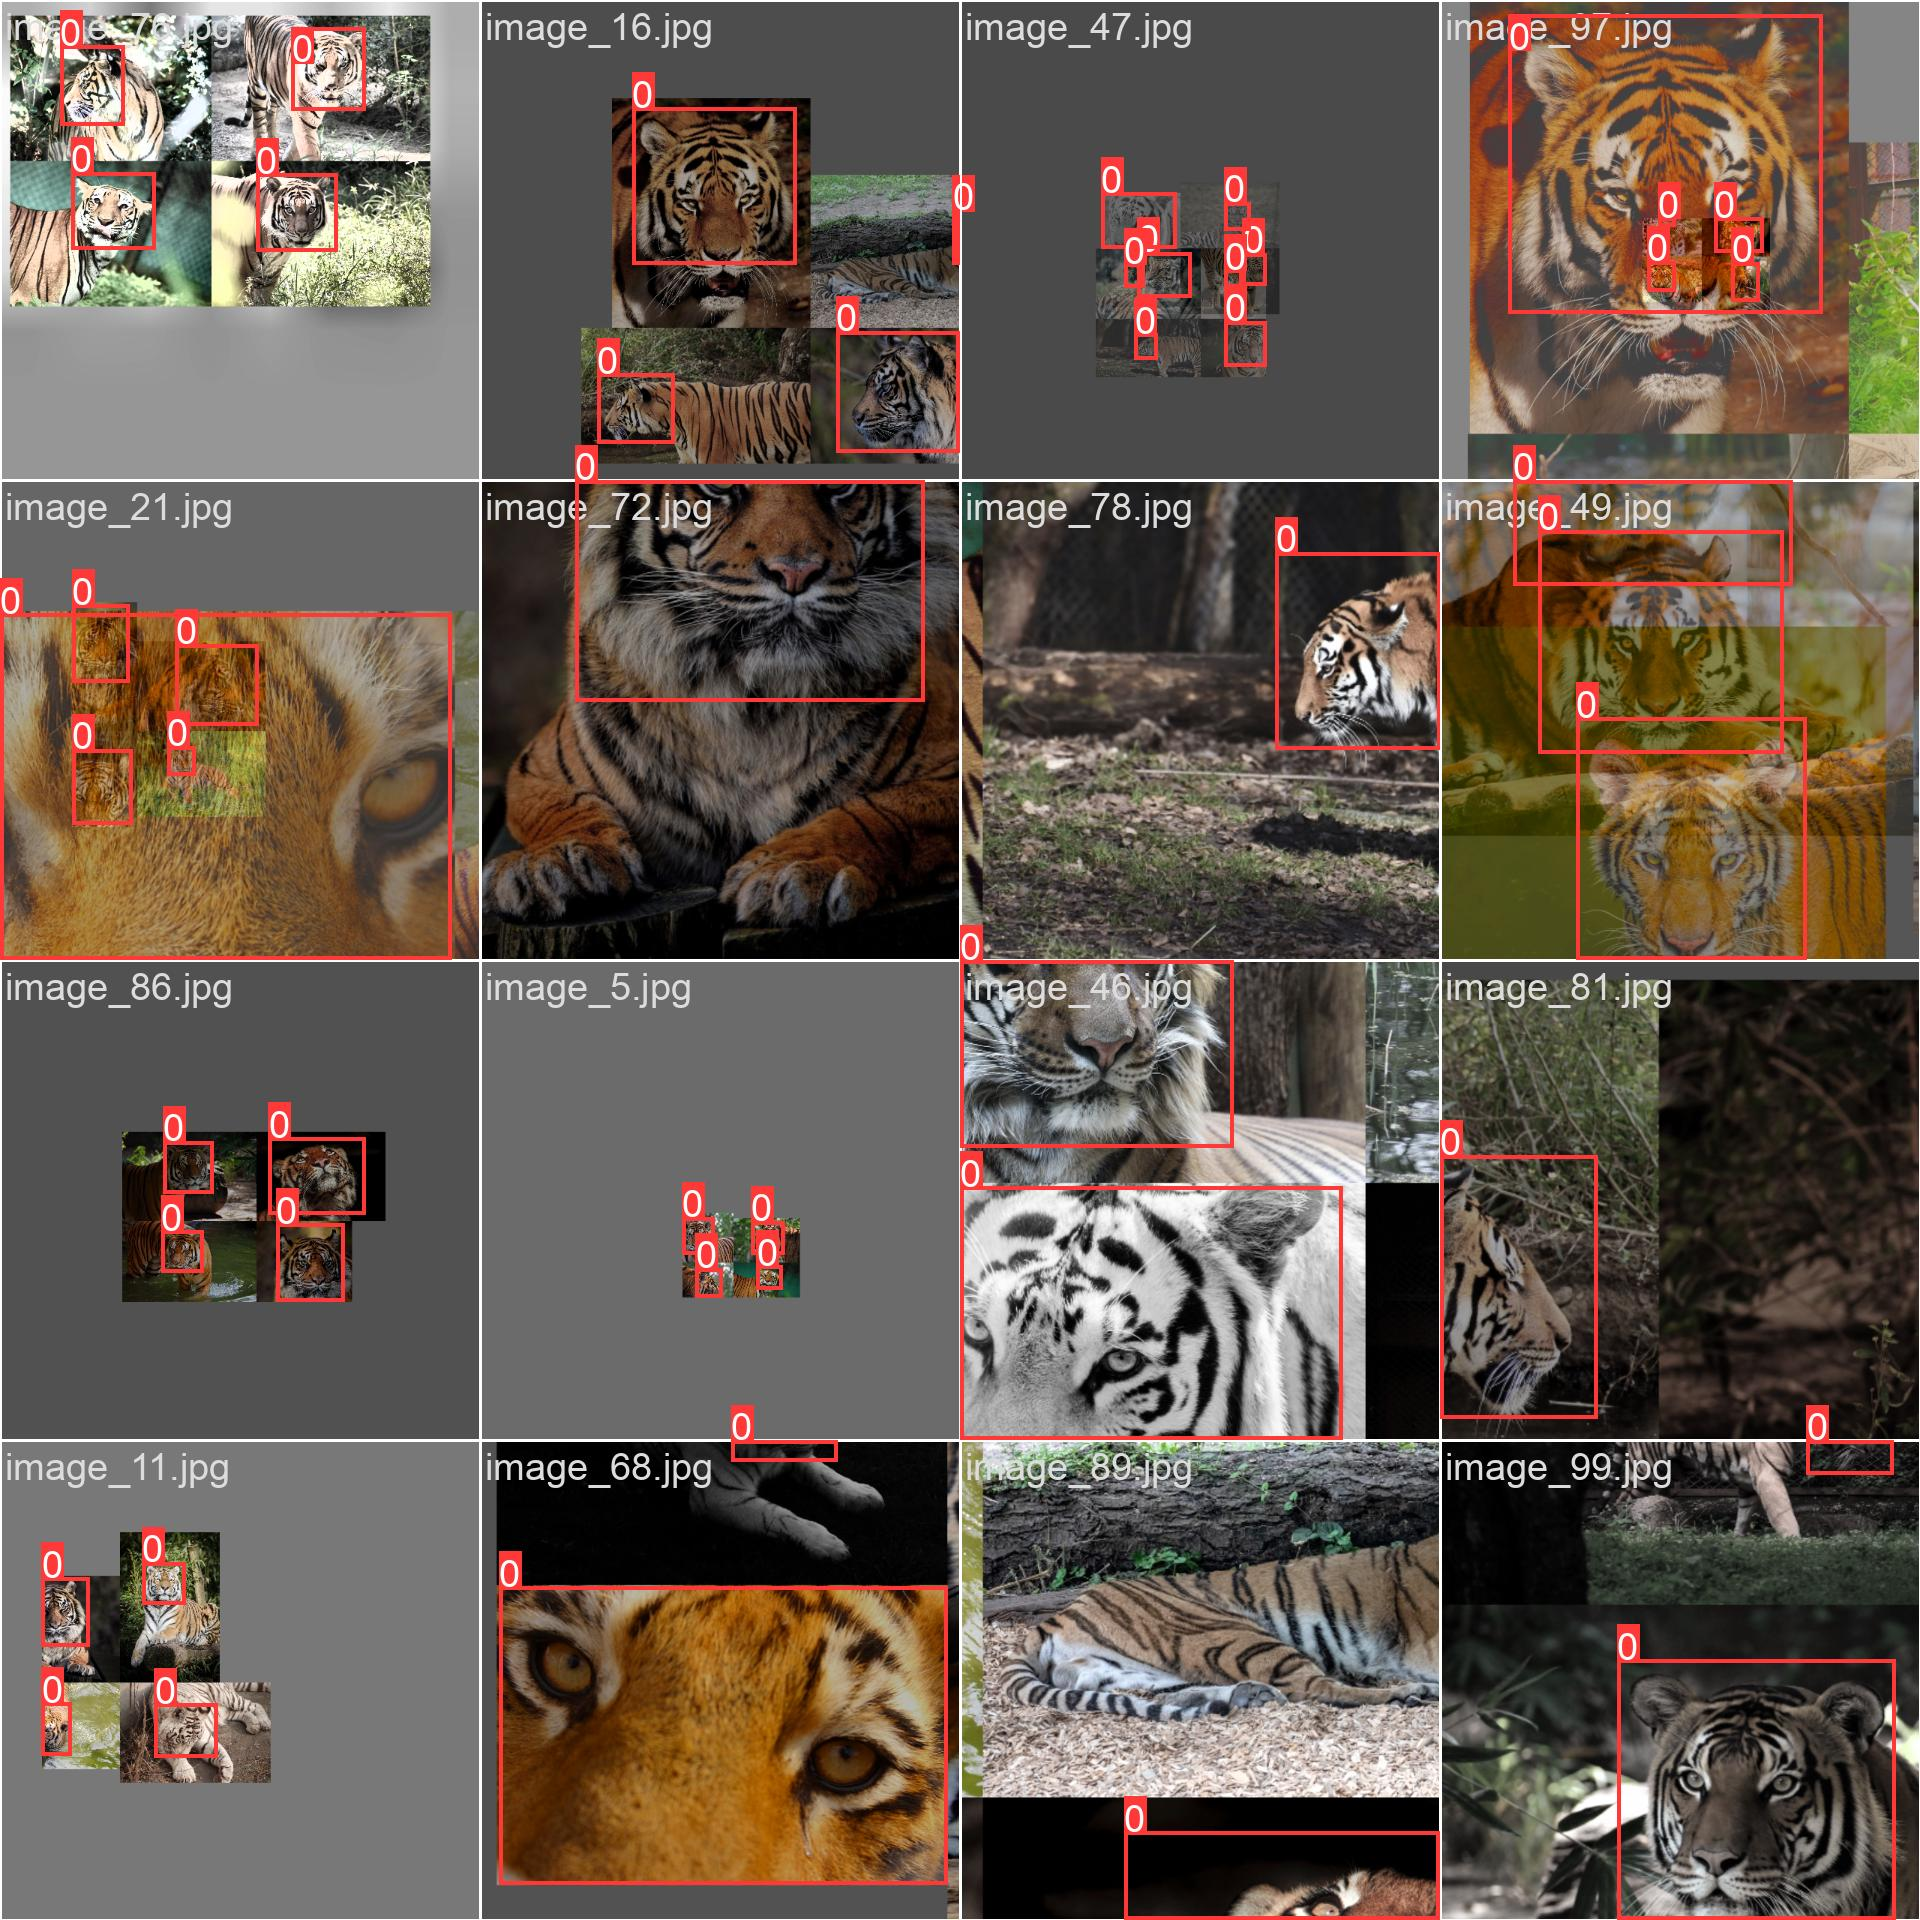

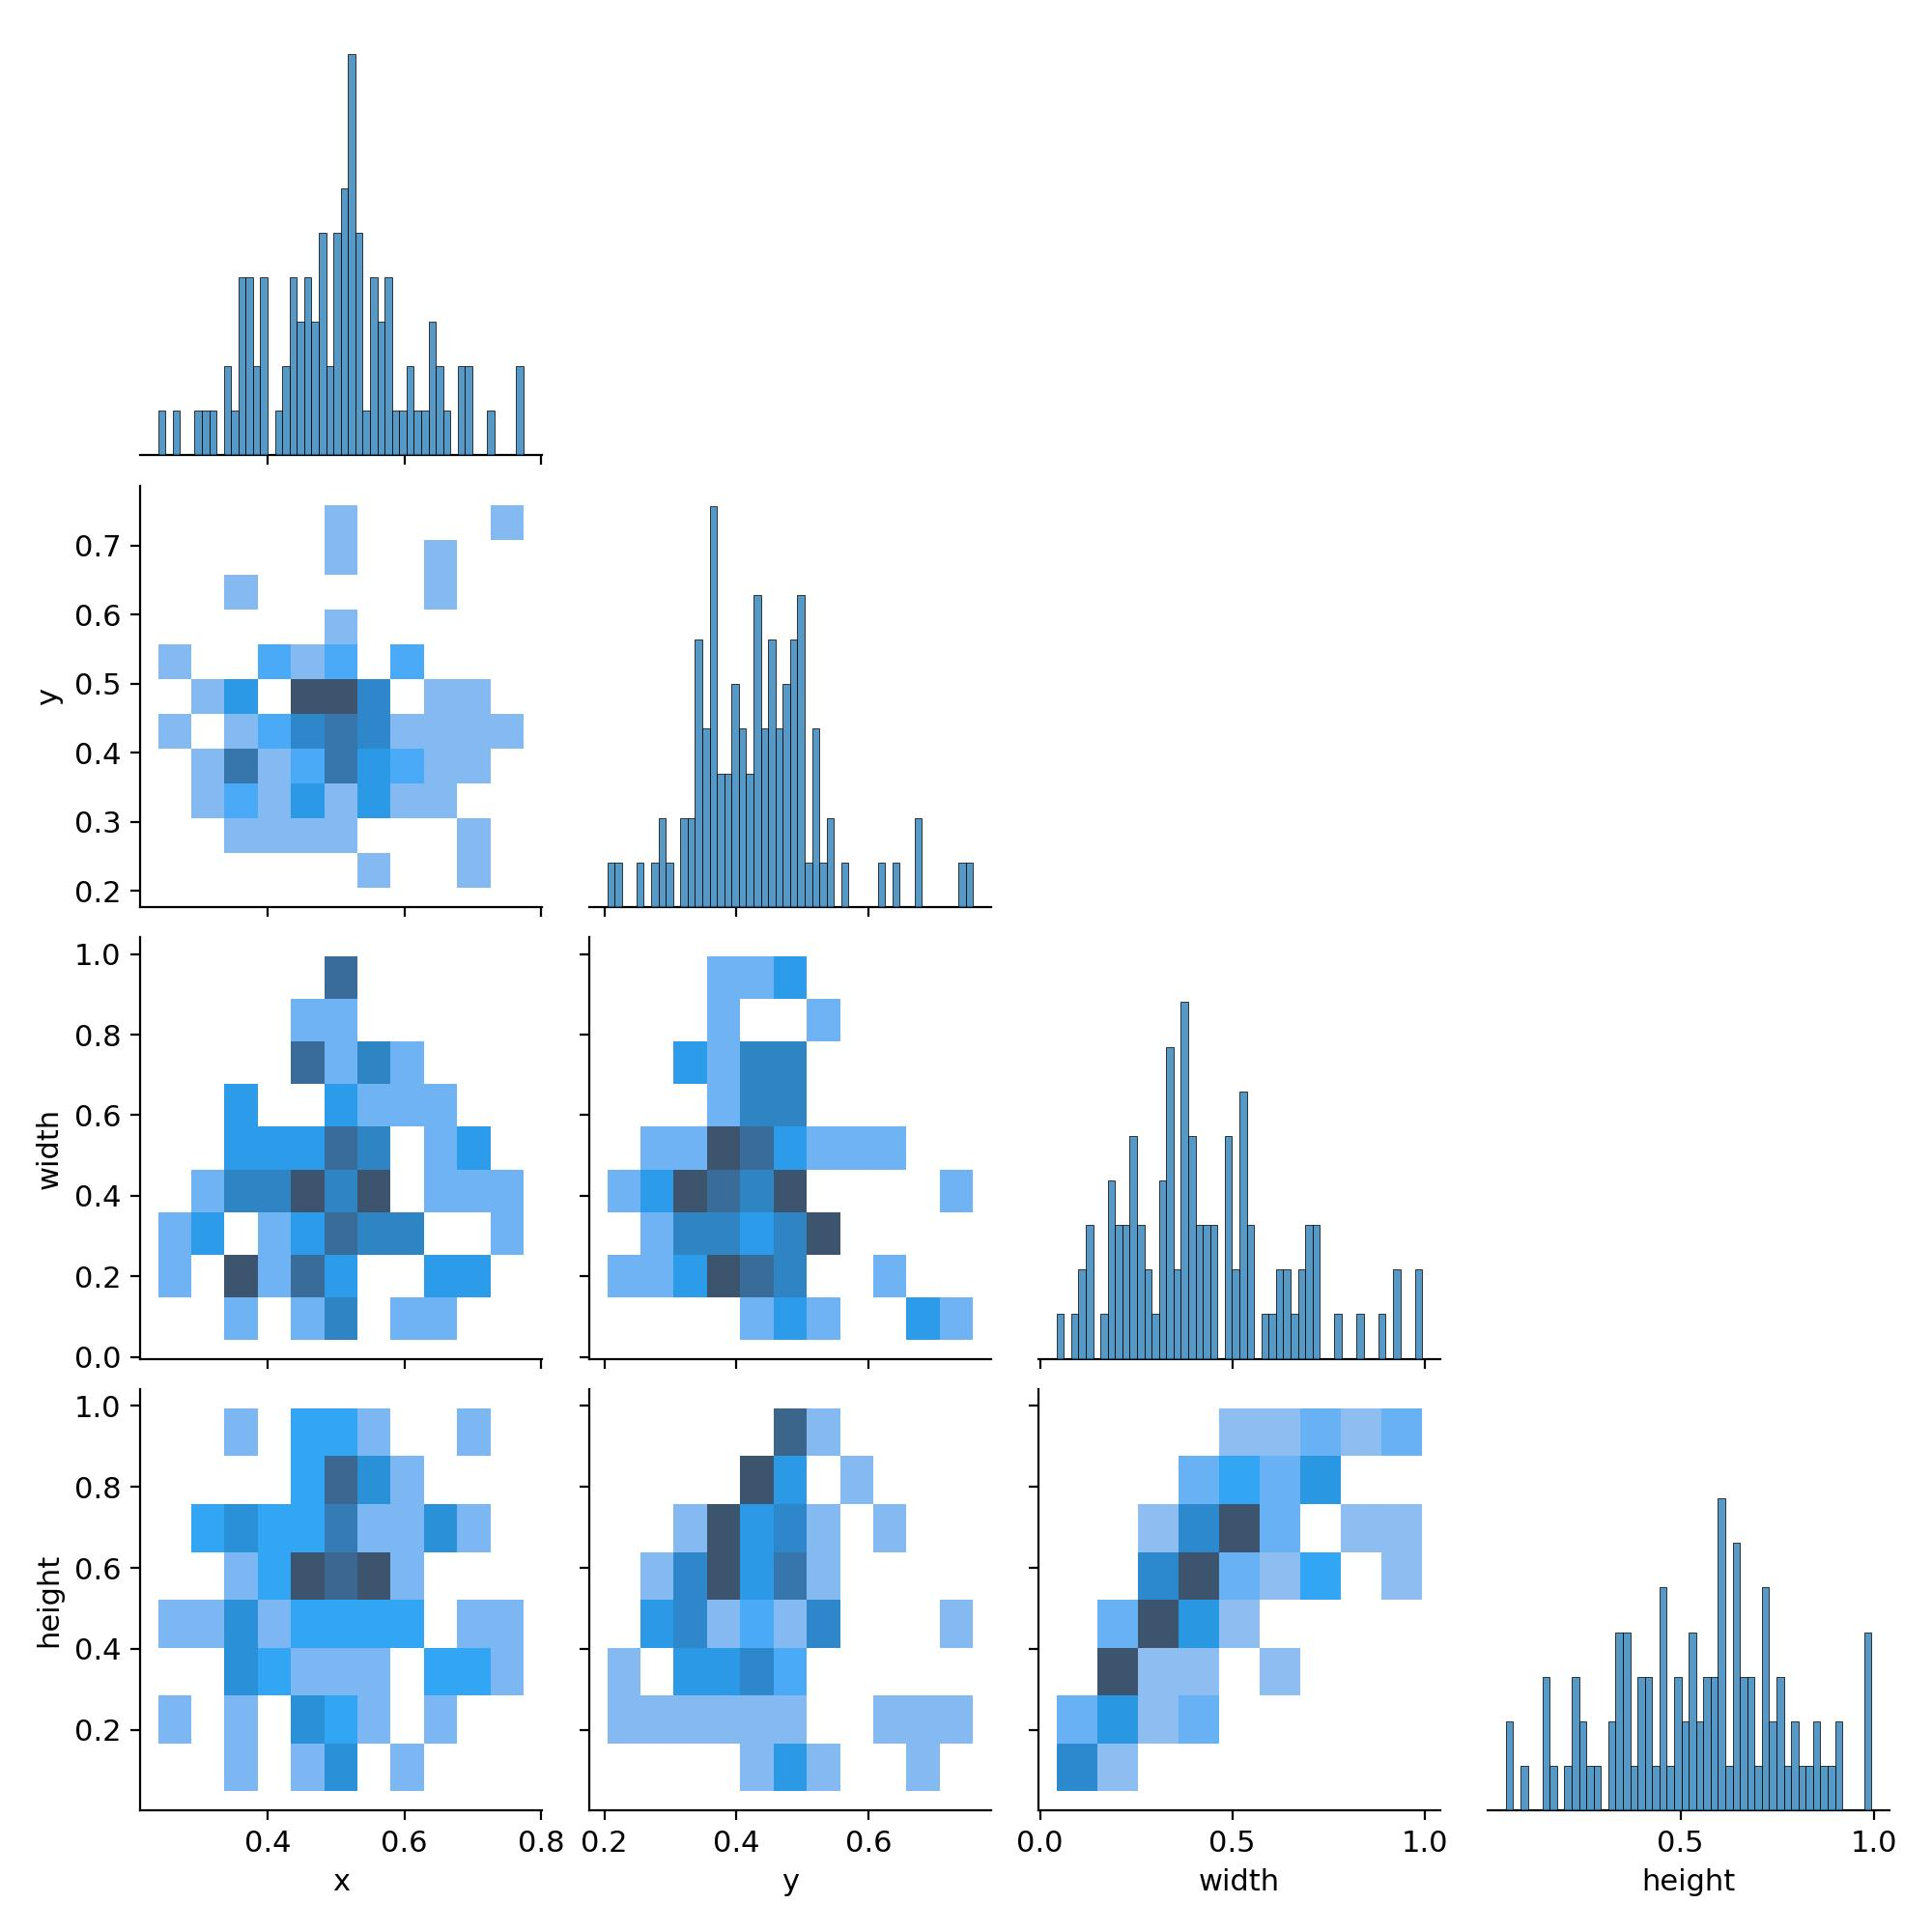

In [15]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/src/yolov9/runs/train/exp/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))